In [1]:
'''
Attempting all the same techniques using mode imputation instead of dropping the nans. Drop NaNs for target 
variables one at a time.
'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

df = pd.read_csv('/Users/trekz1/Documents/Applied Data Sci/Coursework/screenTime/numeric-maps-synthetic-data-v1.1.csv')

# list of target variables:
target_variables = ['dep_score','dep_thoughts','panic_score']

target_variables_drop = ['dep_thoughts','panic_score']  # target variable = dep_score

# irrelevant features:
redundant_features = ['sex','height_16','has_dep_diag','prim_diag','secd_diag']

non_screentime_features = ['agg_score', 'alon_week', 'alon_wend', 'anx_band_07', 'anx_band_10', 
                           'anx_band_13', 'anx_band_15', 'birth_order', 'child_bull', 'creat_14', 
                           'dep_band_07', 'dep_band_10', 'dep_band_13', 'dep_band_15', 'draw_week', 
                           'draw_wend', 'emot_cruel', 'exercise', 'iq', 'mat_age', 
                           'mat_anx_0m', 'mat_anx_1', 'mat_anx_18m', 'mat_anx_8m', 'mat_dep', 'mat_edu', 
                           'mat_ses', 'musi_13', 'musi_week', 'musi_wend', 'num_home', 'out_sum_week', 
                           'out_sum_wend', 'out_win_week', 'out_win_wend', 'parity', 'pat_edu', 'pat_pres', 
                           'pat_pres_10', 'pat_pres_8', 'pat_ses', 'phone_14_week', 'phone_14_wend', 'phys_cruel', 
                           'play_week', 'play_wend', 'read_week', 'read_wend', 'talk_phon_week', 
                           'talk_phon_wend', 'tran_week', 'tran_wend', 'work_week', 'work_wend','bmi_16']

dep_score = df[['dep_score']]
dep_score = dep_score.dropna()
# print(dep_score.shape)

df = df.drop(non_screentime_features, axis=1)
df = df.drop(redundant_features, axis=1)
df1 = df.loc[dep_score.index]
df1 = df1.drop(target_variables_drop,axis=1)  # dataframe of just screentime features plus a target variable
                                              #                                     - dep_score in this case
df1.fillna(df1.mode().loc[0])


print(df1.shape)
print(df1.columns)


# for col in target_variables:
#     df1 = df[[col]]
#     df1 = df1.dropna()
#     print(df1.shape)
    


# df = df.drop(non_screentime_features, axis=1)
# df = df.drop(redundant_features, axis=1)
# df1 = df.drop(target_variables_drop, axis=1)
# df1 = df1.fillna(df1.mode().loc[0])


(4513, 20)
Index(['comp_bed_9', 'comp_noint_bed_16', 'comp_int_bed_16', 'text_wend',
       'talk_mob_wend', 'comp_wend', 'tv_wend', 'text_week', 'talk_mob_week',
       'comp_week', 'tv_week', 'tv_bed_9', 'own_mob', 'dep_score',
       'comp_house', 'tv_bed_16', 'comp_games', 'fam_tv_eve', 'fam_tv_aft',
       'fam_tv_mor'],
      dtype='object')


In [2]:
print(target_variables)


['dep_score', 'dep_thoughts', 'panic_score']


In [3]:
presentable_names = {
 'agg_score': 'Aggression Score',
 'alon_week': 'Alone Weekdays 16',
 'alon_wend': 'Alone Weekend 16',
 'anx_band_07': 'Anxiety Band 07',
 'anx_band_10': 'Anxiety Band 10',
 'anx_band_13': 'Anxiety Band 13',
 'anx_band_15': 'Anxiety Band 15',
 'birth_order': 'Birth Order',
 'child_bull': 'Child Bullied',
 'comp_bed_9': 'Computer Bed 09',
 'comp_games': 'Computer Games 05',
 'comp_house': 'Computer No Internet 16',
 'comp_int_bed_16': 'Computer Internet Bed 16',
 'comp_noint_bed_16': 'Computer No Internet Bed 16',
 'comp_week': 'Computer Time Weekday 16',
 'comp_wend': 'Computer Time Weekend 16',
 'creat_14': 'Creative Activities 14',
 'dep_band_07': 'Depression Band 07',
 'dep_band_10': 'Depression Band 10',
 'dep_band_13': 'Depression Band 13',
 'dep_band_15': 'Depression Band 15',
 'dep_score': "Depression Score",
 'dep_thoughts': "Depressive Thoughts",
 'draw_week': 'Time Drawing Weekday 16',
 'draw_wend': 'Time Drawing Weekend 16',
 'emot_cruel': 'Emotionally Cruel',
 'exercise': 'Exercise Frequency 16',
 'fam_tv_aft': 'TV Frequency Afternoons 01',
 'fam_tv_eve': 'Tv Frequency Evenings 01',
 'fam_tv_mor': 'TV Frequency Mornings 01',
 'has_dep_diag': 'Depression Diagnosis',
 'height_16': "Height 16",
 'iq': "IQ 08",
 'mat_age': 'Maternal Age Birth',
 'mat_anx_0m': 'Maternal Anxiety 0m',
 'mat_anx_1': 'Maternal Anxiety 01',
 'mat_anx_18m': 'Maternal Anxiety 18m',
 'mat_anx_8m': 'Maternal Anxiety 8m',
 'mat_dep': "Maternal Postnatal Depression",
 'mat_edu': 'Maternal Education',
 'mat_ses': "Mother's Social Class",
 'musi_13': 'Musical Instrument 13',
 'musi_week': 'Musical Time Weekday 13',
 'musi_wend': 'Musical Time Weekend 13',
 'num_home': 'Number People Home 04',
 'out_sum_week': 'Outside Time Summer Weekday 16',
 'out_sum_wend': 'Outside Time Summer Weekend 16',
 'out_win_week': 'Outside Time Winter Weekday 16',
 'out_win_wend': 'Outside Time Winter Weekend 16',
 'own_mob': 'Own Mobile 10',
 'panic_score': "Panic Score",
 'parity': "Pregnancy Parity",
 'pat_edu': "Paternal Education",
 'pat_pres': 'Paternal Presence 04',
 'pat_pres_10': 'Paternal Presence 10',
 'pat_pres_8': 'Paternal Presence 08',
 'pat_ses': "Paternal Social Class",
 'phone_14_week': 'Weekday Phone 14',
 'phone_14_wend': 'Weekend Phone 14',
 'phys_cruel': 'Physically Cruel',
 'play_week': 'Weekday Social 16',
 'play_wend': 'Weekend Social 16',
 'prim_diag': "Primary Diagnosis",
 'read_week': 'Weekday Reading 16',
 'read_wend': 'Weekend Reading 16',
 'secd_diag': "Secondary Diagnosis",
 'sex': 'Sex',
 'talk_mob_week': 'Mob. Phone Weekday 16',
 'talk_mob_wend': 'Mob. Phone Weekend 16',
 'talk_phon_week': 'Phone Weekday 16',
 'talk_phon_wend': 'Phone weekend 16',
 'text_week': 'Text Weekday 16',
 'text_wend': 'Text Weekend 16',
 'tran_week': 'Transport Weekday 16',
 'tran_wend': 'Transport Weekend 16',
 'tv_bed_16': 'TV Bedroom 16',
 'tv_bed_9': 'TV Bedroom 09',
 'tv_week': 'TV Weekday 16',
 'tv_wend': 'TV Weekend 16',
 'weight_16': "Weight 16",
 'work_week': 'Work Weekday 16',
 'work_wend': 'Work Weekend 16'
}

In [4]:
'''
Checking correlations in this dataset, linear and non-linear
'''

# calculating linear correlations between all feature variables and target variables
df = pd.read_csv('/Users/trekz1/Documents/Applied Data Sci/Coursework/screenTime/numeric-maps-synthetic-data-v1.1.csv')
corr_mat = df.corr()  # all correlations in df
df1 = df.drop(non_screentime_features, axis=1)
df1 = df1.drop(redundant_features, axis=1)
df1.fillna(df1.mode().loc[0])
X_columns = df1.drop(columns=target_variables).columns.tolist()


# submatrix of just the correlations between features and targets
corr_submat = corr_mat.loc[X_columns, target_variables] 

print(corr_submat.shape)

# Flatten the correlation matrix to a Series
corr_series = corr_submat.unstack()

# Sort by absolute value in descending order
sorted_corr_series = corr_series.abs().sort_values(ascending=False)

# Print the top 20 correlations
print(sorted_corr_series.head(20))

spearman_corr_mat = df.corr(method='spearman')
kendall_corr_mat = df.corr(method='kendall')

# submatrices of just the correlations between features and targets
spearman_submat = spearman_corr_mat.loc[X_columns, target_variables] 
kendall_submat = kendall_corr_mat.loc[X_columns, target_variables] 

print(spearman_submat.shape)
print(kendall_submat.shape)

# Flatten the correlation matrices to Series
spearman_series = spearman_submat.unstack()
kendall_series = kendall_submat.unstack()

# sort the series
sorted_spearmans_series = spearman_series.abs().sort_values(ascending=False)
sorted_kendall_series = kendall_series.abs().sort_values(ascending=False)

print(sorted_spearmans_series.head(20))
print(sorted_kendall_series.head(20))

(19, 3)
dep_thoughts  text_wend          0.062205
dep_score     own_mob            0.059271
dep_thoughts  own_mob            0.057310
              comp_games         0.049812
              comp_house         0.048577
              text_week          0.045757
              tv_bed_16          0.041604
panic_score   comp_week          0.036626
dep_thoughts  tv_week            0.035841
              comp_int_bed_16    0.035400
dep_score     comp_house         0.035387
panic_score   text_wend          0.031582
dep_score     comp_week          0.030421
panic_score   tv_bed_9           0.030237
dep_thoughts  talk_mob_week      0.028802
dep_score     text_wend          0.027194
panic_score   tv_wend            0.027105
              text_week          0.025984
dep_thoughts  tv_wend            0.025056
dep_score     text_week          0.024807
dtype: float64
(19, 3)
(19, 3)
dep_score     own_mob            0.072874
dep_thoughts  text_wend          0.056097
              comp_games         0.04

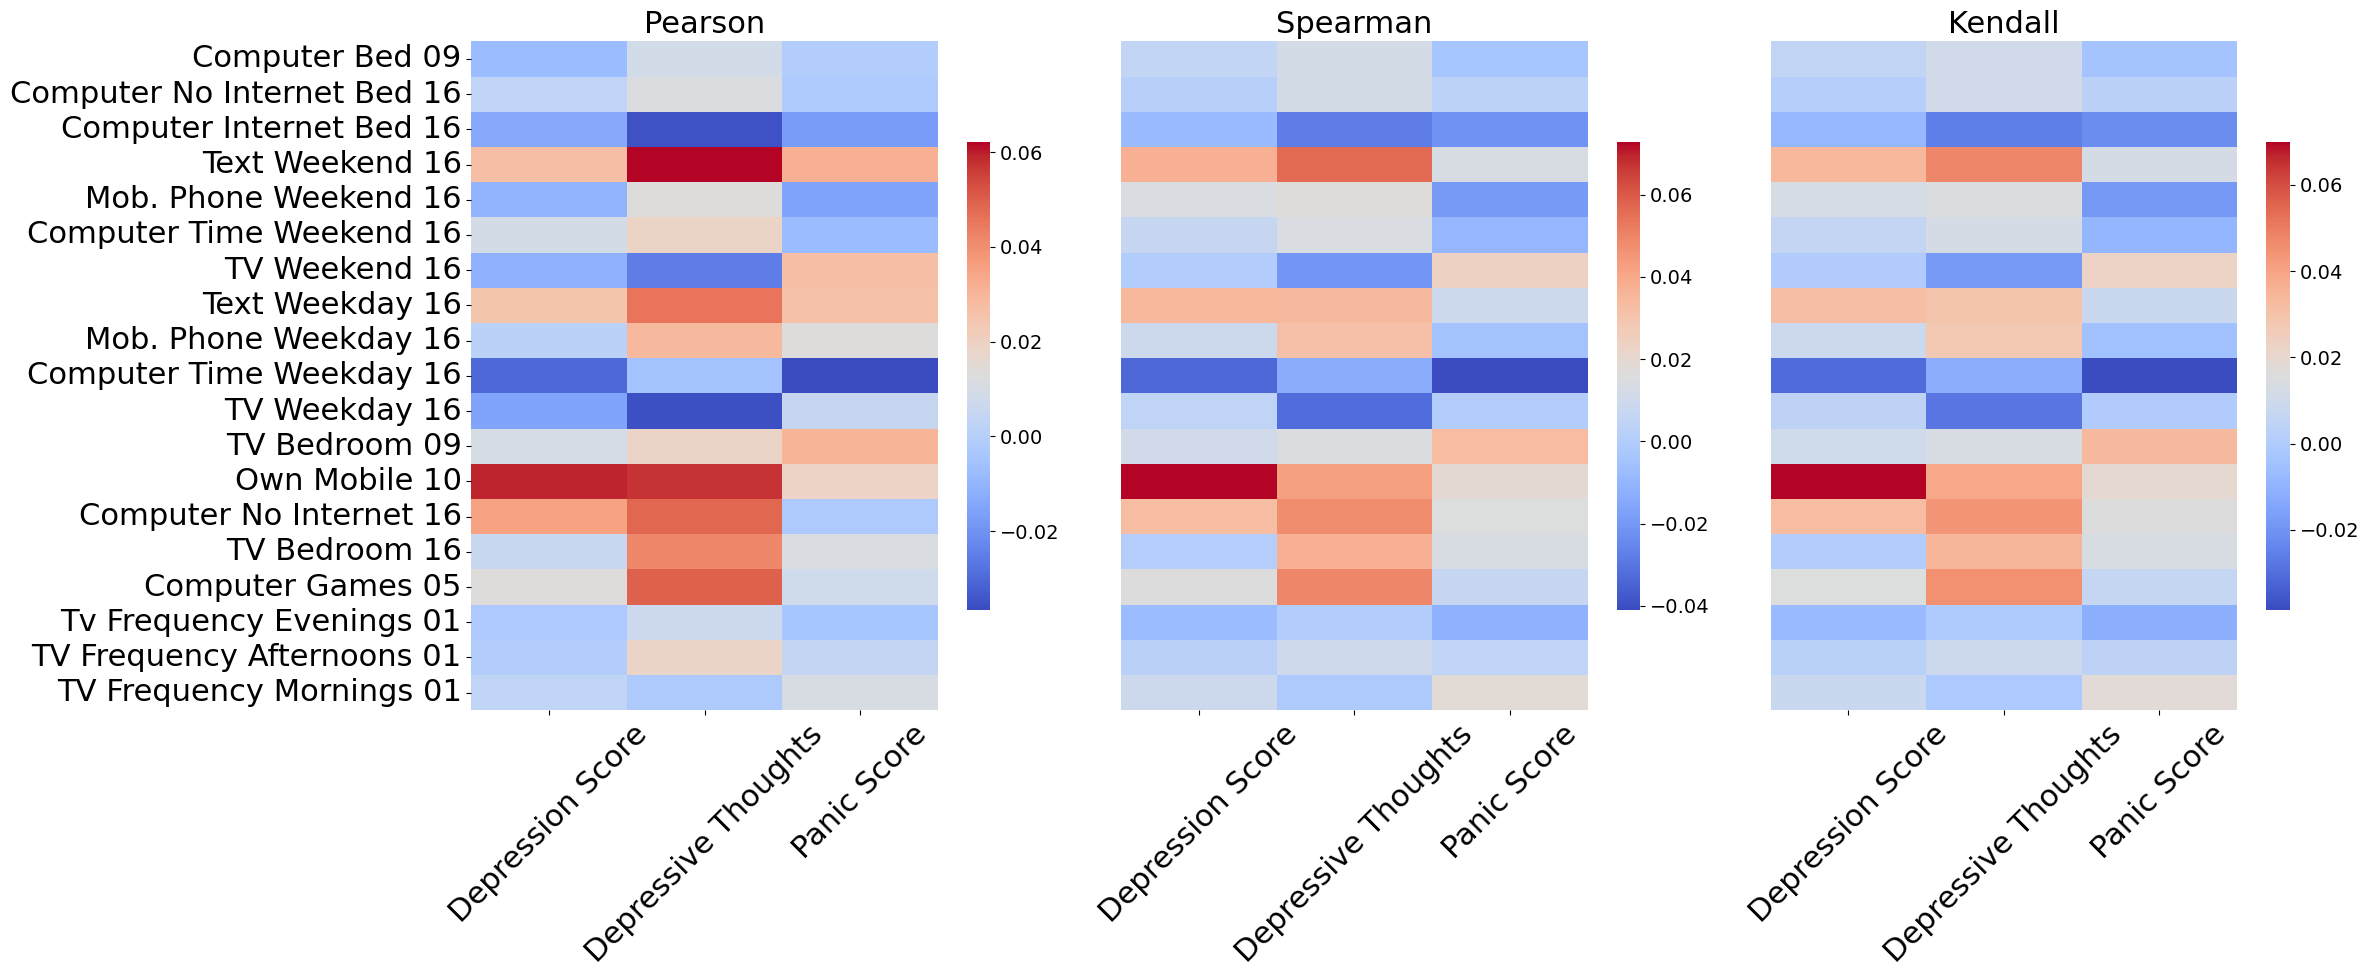

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Renaming columns for better presentation
corr_submat.columns = [presentable_names.get(col, col) for col in corr_submat.columns]
corr_submat.index = [presentable_names.get(idx, idx) for idx in corr_submat.index]

spearman_submat.columns = [presentable_names.get(col, col) for col in spearman_submat.columns]
spearman_submat.index = [presentable_names.get(idx, idx) for idx in spearman_submat.index]

kendall_submat.columns = [presentable_names.get(col, col) for col in kendall_submat.columns]
kendall_submat.index = [presentable_names.get(idx, idx) for idx in kendall_submat.index]


# Set up the matplotlib figure
plt.figure(figsize=(24,))  # Adjust the width and height to make the plot shorter and wider

# Adjust subplots to be side by side and set a higher aspect ratio
# Heatmap for Pearson Correlation
plt.subplot(1, 3, 1)
sns.heatmap(corr_submat, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, 
            xticklabels=True, yticklabels=True, cbar_kws={'shrink': 0.7})
plt.title('Pearson', fontsize=22)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)

# Heatmap for Spearman Correlation
plt.subplot(1, 3, 2)
sns.heatmap(spearman_submat, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, 
            xticklabels=True, yticklabels=False, cbar_kws={'shrink': 0.7})  # No y-axis labels except for the first
plt.title('Spearman', fontsize=22)
plt.xticks(rotation=45, fontsize=22)

# Heatmap for Kendall Correlation
plt.subplot(1, 3, 3)
sns.heatmap(kendall_submat, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, 
            xticklabels=True, yticklabels=False, cbar_kws={'shrink': 0.7})  # No y-axis labels except for the first
plt.title('Kendall', fontsize=22)
plt.xticks(rotation=45, fontsize=22)

# Adjust layout
plt.tight_layout()  # This will make sure everything fits without overlapping
plt.savefig('correlation_heatmapas.png')
plt.show()

{'dep_score': -0.017268090872094067, 'dep_thoughts': -0.015347548536441989, 'panic_score': -0.01764731619505889}
{'dep_score': 1.2168517169787159, 'dep_thoughts': 1.3413683412939417, 'panic_score': 0.48216686560000765}


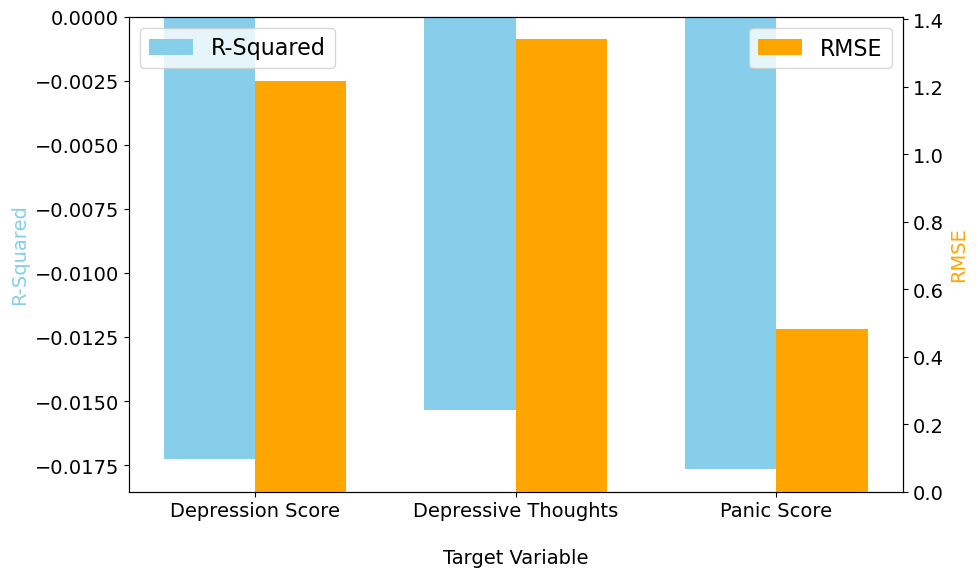

In [6]:
'''
Low correlation scores all round. Linear regression for all the variables:
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/Users/trekz1/Documents/Applied Data Sci/Coursework/screenTime/mode_imputed.csv')
# df = pd.read_csv('/Users/trekz1/Documents/Applied Data Sci/Coursework/screenTime/numeric-maps-synthetic-data-v1.1.csv')

if not target_variables:
    raise ValueError("The target_variables list is empty. Please define target variables.")

# Number of runs for each target variable
n_runs = 100

# Initialize dictionaries to hold the metrics
r2_results = {}
rmse_results = {}


for target in target_variables:
    relevant_features = [col for col in df.columns if col not in non_screentime_features + 
                         redundant_features + [tv for tv in target_variables if tv != target]]
    df_subset = df[relevant_features]
    df_subset_cleaned = df_subset.dropna()

    X = df_subset_cleaned.drop(columns=[target])
    y = df_subset_cleaned[target]

    r2s = []
    rmses = []

    for _ in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        rmses.append(rmse)
        r2s.append(r2)

    r2_results[target] = np.mean(r2s)
    rmse_results[target] = np.mean(rmses)

print(r2_results)
print(rmse_results)
# Replace target variable names with presentable names for plotting
mapped_target_names = [presentable_names.get(target, target) for target in target_variables]

# Now use 'mapped_target_names' for x-tick labels

# Set global font size to 16
plt.rcParams.update({'font.size': 14})

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set position of bar on X axis
ind = np.arange(len(mapped_target_names))
width = 0.35

# Collect the R2 and RMSE values for plotting
r2_values = [r2_results[target] for target in target_variables]
rmse_values = [rmse_results[target] for target in target_variables]

# Plot R2 bars
rects1 = ax1.bar(ind - width/2, r2_values, width, label='R-Squared', color='skyblue')

# Create a twin Axes sharing the xaxis for the RMSE
ax2 = ax1.twinx()
# Plot RMSE bars
rects2 = ax2.bar(ind + width/2, rmse_values, width, label='RMSE', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Target Variable', labelpad=20)
ax1.set_ylabel('R-Squared', color='skyblue')
ax2.set_ylabel('RMSE', color='orange')
# ax1.set_title('R^2 and RMSE for Each Regression')
ax1.set_xticks(ind)
ax1.set_xticklabels(mapped_target_names, ha='center')

# Set legends
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=16)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=16)

# Change the tick parameters
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Ensure that the labels and legends do not get cut off and display the plot
fig.tight_layout()
plt.savefig('linear_regression_results.png')
plt.show()

In [62]:
if not target_variables:
    raise ValueError("The target_variables list is empty. Please define target variables.")

# Number of runs for each target variable
n_runs = 100

# Initialize dictionaries to hold the metrics
r2_results = {}
rmse_results = {}
coefficients = {target: [] for target in target_variables}

for target in target_variables:
    relevant_features = [col for col in df.columns if col not in non_screentime_features + 
                         redundant_features + [tv for tv in target_variables if tv != target]]
    df_subset = df[relevant_features]
    df_subset_cleaned = df_subset.dropna()

    X = df_subset_cleaned.drop(columns=[target])
    y = df_subset_cleaned[target]

    r2s = []
    rmses = []
    all_coefficients = []

    for _ in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        rmses.append(rmse)
        r2s.append(r2)
        all_coefficients.append(model.coef_)

    r2_results[target] = np.mean(r2s)
    rmse_results[target] = np.mean(rmses)
    coefficients[target] = np.mean(all_coefficients, axis=0)  # Average coefficients across runs


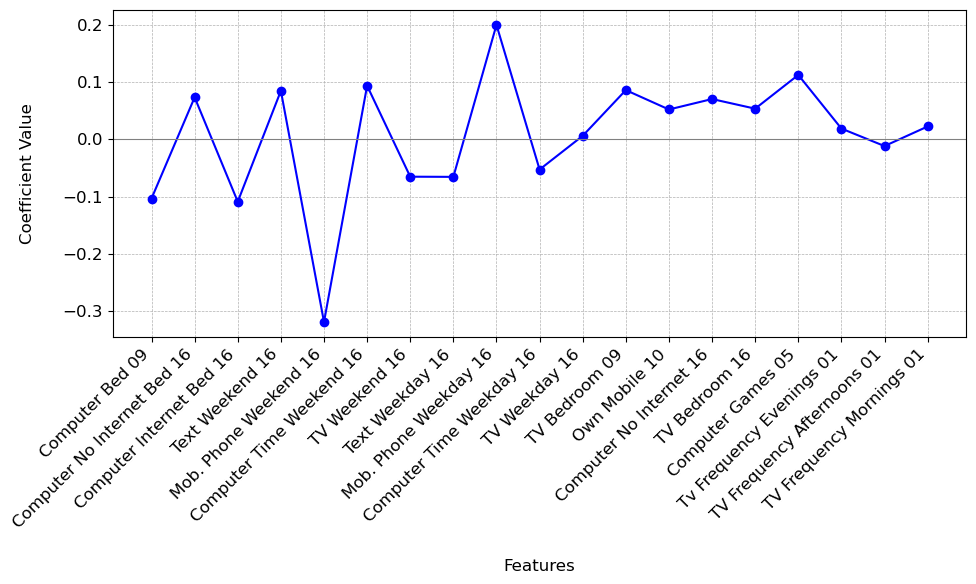

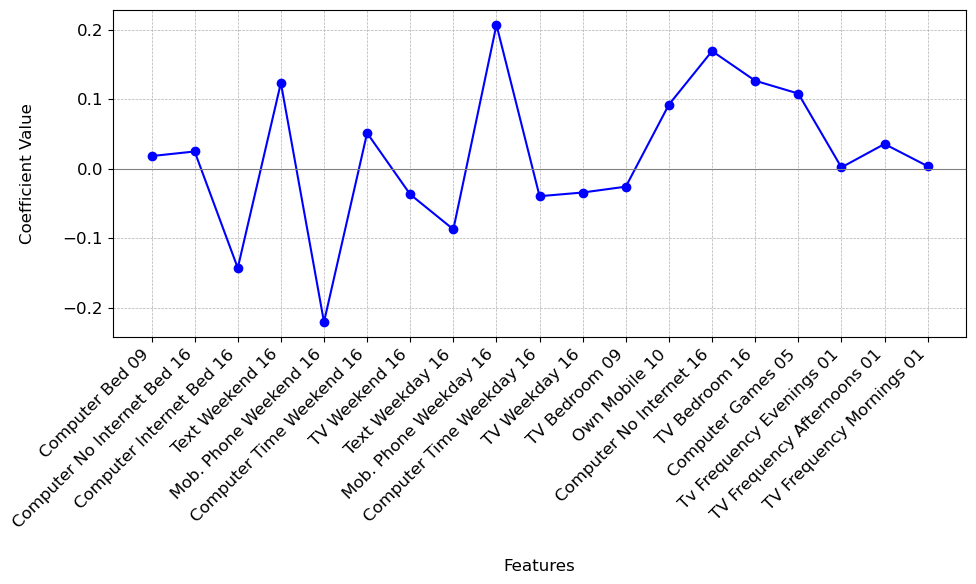

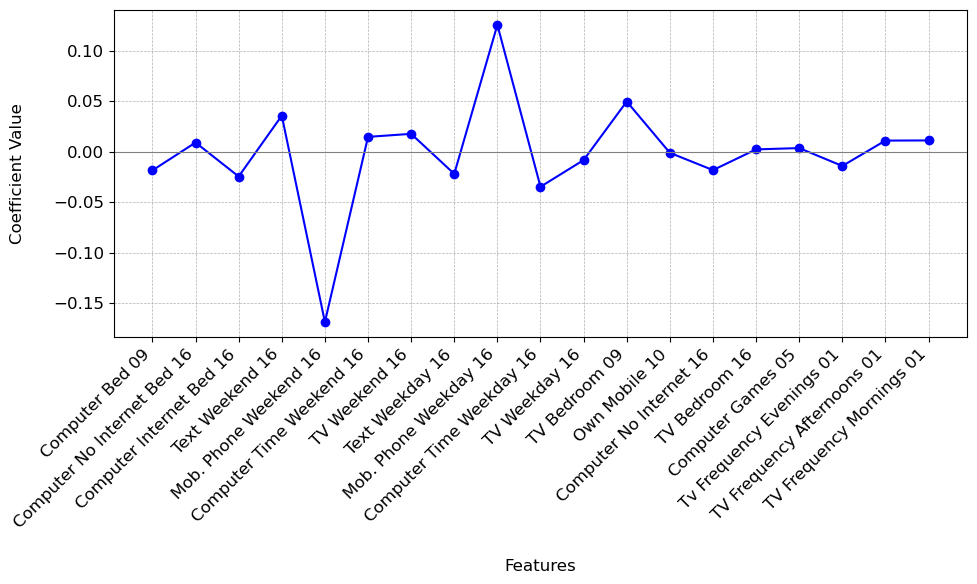

In [72]:
# Apply mapping to feature names
mapped_feature_names = [presentable_names.get(name, name) for name in X.columns]

features_presentable = {'dep_score': 'Depression Score',
'dep_thoughts': 'Depressive Thoughts',
'panic_score': 'Panic Score'}

# Plot settings
plt.rcParams.update({'font.size': 12})  # Adjust font size for readability

# Plotting each set of coefficients for each target variable
for target, coef in coefficients.items():
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

    # Create line chart
    ax.plot(mapped_feature_names, coef, marker='o', linestyle='-', color='blue')  # Using markers to indicate data points

    # Add labels and title
    ax.set_xlabel('Features', labelpad=20)
    ax.set_ylabel('Coefficient Value', labelpad=20)
#     ax.set_title(f'Mean Coefficients for {features_presentable.get(target, target)}', pad=20)
    ax.axhline(0, color='gray', linewidth=0.8)  # Add a horizontal line at zero

    # Rotate feature names for better visibility
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    # Show grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Save the plot as a PNG file
    plt.savefig(f'mean_coefficients_line_chart_{target}.png')

    # Show plot
    plt.show()

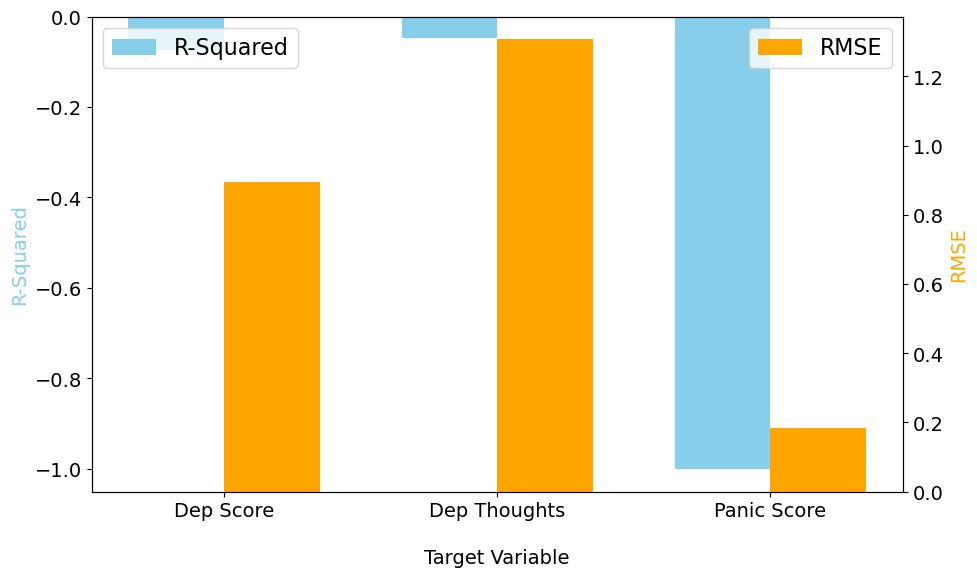

In [74]:
r2_results['dep_score'] = -0.0746
rmse_results['dep_score'] = 0.8942

r2_results['dep_thoughts'] = -0.04665
rmse_results['dep_thoughts'] = 1.3080

r2_results['panic_score'] = -1203420.625
rmse_results['panic_score'] = 0.1828

# Replace target variable names with presentable names for plotting
mapped_target_names = [presentable_names.get(target, target) for target in target_variables]

# Now use 'mapped_target_names' for x-tick labels

# Set global font size to 16
plt.rcParams.update({'font.size': 14})

# Truncate the R^2 value for 'panic_score' and set a placeholder (e.g., NaN or None)
# Option 2: Truncation
truncated_value = -1  # Set a threshold that suits the scale of your other variables
r2_results['panic_score'] = truncated_value

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Position of bars on X axis
ind = np.arange(len(r2_results))
width = 0.35

# Collect the R2 and RMSE values for plotting
r2_values = [r2_results[key] for key in r2_results]
rmse_values = [rmse_results[key] for key in rmse_results]

# Plot R2 and RMSE bars
ax1.bar(ind - width/2, r2_values, width, label='R-Squared', color='skyblue')
ax2 = ax1.twinx()
ax2.bar(ind + width/2, rmse_values, width, label='RMSE', color='orange')

# Add text for labels, title and custom x-axis tick labels
ax1.set_xlabel('Target Variable', labelpad=20)
ax1.set_ylabel('R-Squared', color='skyblue')
ax2.set_ylabel('RMSE', color='orange')
# ax1.set_title('R-Squared and RMSE for Each Variable')
ax1.set_xticks(ind)
ax1.set_xticklabels(['Dep Score', 'Dep Thoughts', 'Panic Score'], rotation=0, ha='center')

# # Option 4: Annotation for the outlier
# if r2_results['panic_score'] == truncated_value:
#     ax1.annotate(f"R^2: {r2_results['panic_score']:.2e}", 
#                  (ind[-1] - width/2, truncated_value), 
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center', 
#                  arrowprops=dict(arrowstyle="->", color='red'))

# Set legends
ax1.legend(loc='upper left', fontsize=16)
ax2.legend(loc='upper right', fontsize=16)

# Ensure that the labels and legends do not get cut off
fig.tight_layout()
plt.savefig('nn_regression_results')
plt.show()

In [ ]:
'''
Ignore all the remaining code in this file. Working on the NN in a new file - NN_regression.ipynb
'''

In [7]:
df = pd.read_csv('/Users/trekz1/Documents/Applied Data Sci/Coursework/screenTime/numeric-maps-synthetic-data-v1.1.csv')
df = df.drop(non_screentime_features, axis=1)
df = df.drop(redundant_features, axis=1)
df1 = df.loc[dep_score.index]
df1 = df1.drop(target_variables_drop,axis=1)
df1.fillna(df1.mode().loc[0])

print(df1.shape)

X = df1.drop('dep_score',axis=1)
y = df1['dep_score']

print(X.shape)
print(y.shape)

(4513, 20)
(4513, 19)
(4513,)


In [90]:
'''
Low R-squared scores for all the linear regressions. NN next:
'''

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import keras_tuner as kt
import shutil

# train:test:val = 0.8:0.1:0.1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

input_shape = X_train_scaled.shape[1:]

def create_model(input_shape):
    # define model architecture
    model = Sequential([
        layers.Dense(64, activation='relu', 
                     input_shape=(input_shape,)),
        layers.Dropout(0.5), 
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5), 
        layers.Dense(1)
    ])
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='mse', metrics=['mae'])  # mse is a common loss function for regression tasks, 
                                                # mae as a regression measure
    return model

def build_model(hp):
    model = Sequential()
    model.add(layers.Dense(
        hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu', 
        input_dim=input_shape[0]))  # Corrected: use `input_dim` for 1D input
    model.add(layers.Dropout(
        hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(
        hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu'))
    model.add(layers.Dropout(
        hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mse', metrics=['mae'])
    return model

tuner_dir = 'keras_tuner/model_tuning'
shutil.rmtree(tuner_dir, ignore_errors=False)  # `ignore_errors=True` to avoid errors if the directory does not exist

tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=100,  # The maximum number of different hyperparameter combinations to try
    executions_per_trial=1,  # The number of models that should be built and fit for each trial
    directory='tuner_results',  # Directory to save logs
    project_name='nn_regression'
)

# Start the hyperparameter search
tuner.search(
    X_train_scaled, y_train,
    epochs=50,  
    validation_data=(X_val_scaled, y_val),
    verbose=2  
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=50)[0]

model = tuner.hypermodel.build(best_hps)

# train the model
history = model.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=32,
                    verbose=2)

# evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


def plot_history(history, filename='training_history.png'):
    # Plotting Training and Validation Loss
    plt.figure(figsize=(14, 5))
    
    # Subplot for the loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'b-', label='Training Loss')
    plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Subplot for the MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], 'b-', label='Training MAE')
    plt.plot(history.history['val_mae'], 'r-', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(filename)  # Save the plot to a file
    plt.show()
    
    
    
# call plot function
plot_history(history)


Trial 2 Complete [00h 00m 16s]
val_mae: nan

Best val_mae So Far: nan
Total elapsed time: 00h 00m 36s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
64                |256               |units
0.2               |0.1               |dropout
0.00010724        |0.0029002         |learning_rate

Epoch 1/50
113/113 - 1s - loss: nan - mae: nan - val_loss: nan - val_mae: nan - 1s/epoch - 9ms/step
Epoch 2/50
113/113 - 0s - loss: nan - mae: nan - val_loss: nan - val_mae: nan - 253ms/epoch - 2ms/step
Epoch 3/50
113/113 - 0s - loss: nan - mae: nan - val_loss: nan - val_mae: nan - 217ms/epoch - 2ms/step
Epoch 4/50
113/113 - 0s - loss: nan - mae: nan - val_loss: nan - val_mae: nan - 219ms/epoch - 2ms/step
Epoch 5/50
113/113 - 0s - loss: nan - mae: nan - val_loss: nan - val_mae: nan - 222ms/epoch - 2ms/step
Epoch 6/50
113/113 - 0s - loss: nan - mae: nan - val_loss: nan - val_mae: nan - 218ms/epoch - 2ms/step
Epoch 7/50
113/113 - 0s - loss: nan - mae: nan - val_loss: n

RuntimeError: Number of consecutive failures exceeded the limit of 3.


In [ ]:
# If you want to get information about the best trial
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
print(f"Best trial ID: {best_trial.trial_id}")

# You can now get the hyperparameters directly from the best trial object
best_hyperparameters = best_trial.hyperparameters
print(f"Best hyperparameters: {best_hyperparameters.values}")


In [ ]:
'''
Creating a model with the best hyperparameters from above, as well as R2 regularisation
'''

from tensorflow.keras import regularizers
from tensorflow.keras import backend as K


def plot_history_rmse(history, filename='training_history.png'):
    # Plotting Training and Validation Loss
    plt.figure(figsize=(14, 5))
    
    # Subplot for the loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], 'b-', label='Training Loss')
    plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Subplot for the MAE
    plt.subplot(1, 3, 2)
    plt.plot(history.history['mae'], 'b-', label='Training MAE')
    plt.plot(history.history['val_mae'], 'r-', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    # subplot for RMSE
    plt.subplot(1, 3, 3)
    plt.plot(history.history['root_mean_squared_error'], 'b-', label='Training RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], 'r-', label='Validation RMSE')
    plt.title('Training and Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(filename)  # Save the plot to a file
    plt.show()

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))  # RMSE

    
def create_model1(input_shape):  # less layers with regularization - flopped
    # define model architecture
    model = Sequential([
        layers.Dense(448, activation='relu', 
                     input_dim=input_shape[0],
                     kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization,
        layers.Dropout(0.3), 
        layers.Dense(448, activation='relu'),
        layers.Dropout(0.3), 
        layers.Dense(1)
    ])
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007307800174947308),
                  loss='mse', metrics=['mae', root_mean_squared_error])  # mse is a common loss function for regression tasks, 
                                                # mae as a regression measure
    return model

model1 = create_model1(input_shape)

# train the model
history1 = model1.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=32,
                    verbose=2)

plot_history_rmse(history1)




In [ ]:
'''
L2 regularization didn't help overfitting much, attempting now w L1 regularisation
'''

def create_model2(input_shape):  
    # define model architecture
    model = Sequential([
        layers.Dense(448, activation='relu', 
                     input_dim=input_shape[0],
                     kernel_regularizer=regularizers.l1(0.001)),  # L1 regularization,
        layers.Dropout(0.3), 
        layers.Dense(448, activation='relu', 
                     kernel_regularizer=regularizers.l1(0.001)),
        layers.Dropout(0.3), 
        layers.Dense(1)
    ])
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007602798080810777),
                  loss='mse', metrics=['mae', root_mean_squared_error])  # mse is a common loss function for regression tasks, 
                                                # mae as a regression measure
    return model

model2 = create_model2(input_shape)

# train the model
history2 = model2.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=32,
                    verbose=2)

plot_history_rmse(history2)




In [ ]:
'''
L1 regularization may have helped slightly with overfitting, however it's hard to tell. Trying again with a 
combination of L2 and L1 (elastic net).
'''

def create_model3(input_shape):  
    # define model architecture
    model = Sequential([
        layers.Dense(448, activation='relu', 
                     input_dim=input_shape[0],
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # Elastic net regularization,
        layers.Dropout(0.3), 
        layers.Dense(448, activation='relu', 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.Dropout(0.3), 
        layers.Dense(1)
    ])
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007602798080810777),
                  loss='mse', metrics=['mae', root_mean_squared_error])  # mse is a common loss function for regression tasks, 
                                                # mae as a regression measure
    return model

model3 = create_model3(input_shape)

# train the model
history3 = model3.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=32,
                    verbose=2)

plot_history_rmse(history3)


In [ ]:
'''
There doesn't seem to be much difference between L1 and fishnet regularisation. Going to attempt a smaller batch
size now.
'''

history3 = model3.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=16,
                    verbose=2)

history4 = model3.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=16,
                    verbose=2)

plot_history_rmse(history3)

plot_history_rmse(history4)

In [ ]:
'''
The model seems to overfit slightly less with a batch size of 16. Going to build a new version with SGD instead
of Adam.
'''

def create_model4(input_shape):  
    # define model architecture
    model = Sequential([
        layers.Dense(448, activation='relu', 
                     input_dim=input_shape[0],
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # Elastic net regularization,
        layers.Dropout(0.3), 
        layers.Dense(448, activation='relu', 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.Dropout(0.3), 
        layers.Dense(1)
    ])
    # compile model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
                  loss='mse', metrics=['mae', root_mean_squared_error])  # mse is a common loss function for regression tasks, 
                                                # mae as a regression measure
    return model

model4 = create_model4(input_shape)

history4 = model4.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=16,
                    verbose=2)

plot_history_rmse(history4)


In [14]:
'''
SGD does a much better job at preventing overfitting than Adam. Going to attempt another hyperparameter tuner.
'''

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import keras_tuner as kt
import shutil
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import SGD
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

tuner_dir = 'keras_tuner/model_tuning'
shutil.rmtree(tuner_dir, ignore_errors=False)  # `ignore_errors=True` to avoid errors if the directory does not exist

# train:test:val = 0.8:0.1:0.1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

input_shape = X_train_scaled.shape[1:]

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))  # RMSE

def plot_history_rmse(history, filename='training_history.png'):
    # Plotting Training and Validation Loss
    plt.figure(figsize=(14, 5))
    
    # Subplot for the loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], 'b-', label='Training Loss')
    plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Subplot for the MAE
    plt.subplot(1, 3, 2)
    plt.plot(history.history['mae'], 'b-', label='Training MAE')
    plt.plot(history.history['val_mae'], 'r-', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    # subplot for RMSE
    plt.subplot(1, 3, 3)
    plt.plot(history.history['root_mean_squared_error'], 'b-', label='Training RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], 'r-', label='Validation RMSE')
    plt.title('Training and Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(filename)  # Save the plot to a file
    plt.show()



def build_model(hp):
    model = Sequential([
        layers.Dense(
            hp.Int('units_1', min_value=128, max_value=512, step=64),
            activation='relu',
            input_dim=input_shape[0],
            kernel_regularizer=regularizers.l1_l2(
                l1=hp.Float('l1_1', min_value=0.0001, max_value=0.001, sampling='log'),
                l2=hp.Float('l2_1', min_value=0.0001, max_value=0.001, sampling='log')
            )
        ),
        layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(
            hp.Int('units_2', min_value=128, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=regularizers.l1_l2(
                l1=hp.Float('l1_2', min_value=0.0001, max_value=0.001, sampling='log'),
                l2=hp.Float('l2_2', min_value=0.0001, max_value=0.001, sampling='log')
            )
        ),
        layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(1)
    ])
    model.compile(
        optimizer=SGD(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'),
            momentum=hp.Float('momentum', min_value=0.5, max_value=1.0, step=0.1),
            nesterov=True
        ),
        loss='mse',
        metrics=['mae', root_mean_squared_error]
    )
    return model


tuner1 = RandomSearch(
    build_model1,
    objective='val_mae',
    max_trials=1000,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='model_tuning'
)

# Run the hyperparameter search
tuner1.search(
    X_train_scaled,
    y_train,
    epochs=20,  
    validation_data=(X_val_scaled, y_val),
    verbose=2
)


# If you want to get information about the best trial
best_trial = tuner1.oracle.get_best_trials(num_trials=1)[0]
print(f"Best trial ID: {best_trial.trial_id}")

# You can now get the hyperparameters directly from the best trial object
best_hyperparameters = best_trial.hyperparameters
print(f"Best hyperparameters: {best_hyperparameters.values}")



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |units
0.00014997        |0.00014997        |l1
0.0003554         |0.0003554         |l2
0.4               |0.4               |dropout
0.00015172        |0.00015172        |learning_rate
0.7               |0.7               |momentum

Epoch 1/20
113/113 - 2s - loss: nan - mae: nan - root_mean_squared_error: nan - val_loss: nan - val_mae: nan - val_root_mean_squared_error: nan - 2s/epoch - 14ms/step
Epoch 2/20
113/113 - 0s - loss: nan - mae: nan - root_mean_squared_error: nan - val_loss: nan - val_mae: nan - val_root_mean_squared_error: nan - 351ms/epoch - 3ms/step
Epoch 3/20
113/113 - 0s - loss: nan - mae: nan - root_mean_squared_error: nan - val_loss: nan - val_mae: nan - val_root_mean_squared_error: nan - 290ms/epoch - 3ms/step
Epoch 4/20
113/113 - 0s - loss: nan - mae: nan - root_mean_squared_error: nan - val_loss: nan - val_mae: nan - val_root_mean_squared_error: nan

KeyboardInterrupt: 

In [ ]:
'''
New hyperparameters found. Will build a model with said parameters now.
'''

def create_model6(input_shape):  
    # define model architecture
    model = Sequential([
        layers.Dense(128, activation='relu', 
                     input_dim=input_shape[0],
                     kernel_regularizer=regularizers.l1_l2(l1=0.00019400802732097463,
                                                           l2=0.0005089589411401313)),  # Elastic net regularization,
        layers.Dropout(0.2), 
        layers.Dense(128, activation='relu', 
                     kernel_regularizer=regularizers.l1_l2(l1=0.00019400802732097463,
                                                           l2=0.0005089589411401313)),
        layers.Dropout(0.2), 
        layers.Dense(1)
    ])
    # compile model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=00.00011968971043772814, momentum=0.9, nesterov=True),
                  loss='mse', metrics=['mae', root_mean_squared_error])  # mse is a common loss function for regression tasks, 
                                                # mae as a regression measure
    return model

model6 = create_model6(input_shape)

history6 = model6.fit(X_train_scaled,
                    y_train, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, 
                    batch_size=32,
                    verbose=2)

plot_history_rmse(history6)
